Name: NA MA
ID: qq218099

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using Theano backend.


In [2]:
#load dataset with pandas

In [3]:
from os.path import expanduser as ospath
Variant_1 = pd.read_csv(ospath("path/to/file/Features_Variant_1.csv"),header=None)
Variant_2 = pd.read_csv(ospath("path/to/file/Features_Variant_2.csv"),header=None)
Variant_3 = pd.read_csv(ospath("path/to/file/Features_Variant_3.csv"),header=None)
Variant_4 = pd.read_csv(ospath("path/to/file/Features_Variant_4.csv"),header=None)
Variant_5 = pd.read_csv(ospath("path/to/file/Features_Variant_5.csv"),header=None)
TestSet = pd.read_csv(ospath("path/to/file/Features_TestSet.csv"),header=None)

In [4]:
#header file for all dtaset header info
header = pd.read_csv(ospath("path/to/file/header.csv"),header=0)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Preprocess dataset,define function for feature/target separation, train/test split
def preprocessing(variant_x):
    train_variant = pd.DataFrame(variant_x)
    train_variant.columns=header.columns
    target = 'Target'
    features = list(train_variant.columns)
    features = [f for f in features if f!=target]
    X=train_variant[features]
    y=train_variant[[target]]
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3,random_state=42)
    return X_train_1, X_test_1, y_train_1, y_test_1

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
#using random forest regressor conduct prediction 

In [9]:
#function for Grid_search_cv for randomforestregressor
def Grid_Search_CV_RFR(X_train, y_train):
    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3,scoring='mean_squared_error')

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [10]:
from sklearn.metrics import r2_score

In [11]:
def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    print("MSE:",mean_squared_error(y_test,y_predict))
    return r2_score(y_test,y_predict),mean_squared_error(y_test,y_predict)

In [12]:
#with varian_1 step one =preprocessing-gridsearch

In [13]:
X_train_1, X_test_1, y_train_1, y_test_1 =preprocessing(Variant_1)

In [14]:
best_score, best_params= Grid_Search_CV_RFR(X_train_1, y_train_1)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


In [15]:
RFR(X_train_1,X_test_1, y_train_1, y_test_1,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.626473670797
MSE: 379.311123574


(0.62647367079710981, 379.31112357408534)

In [16]:
#scalling X_train,X_test-to see r2 score and mse change

In [17]:
def scalling (X_train_1,X_test_1):
    scaler = StandardScaler()
    scaler.fit(X_train_1)
    X_trainS = scaler.transform(X_train_1)
    X_testS = scaler.transform(X_test_1)
    return X_trainS,X_testS 

In [18]:
X_trainS,X_testS=scalling (X_train_1,X_test_1)

In [19]:
best_score, best_params= Grid_Search_CV_RFR(X_trainS, y_train_1)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


In [20]:
Variant_1_R2,Variant_1_MSE=RFR(X_trainS,X_testS, y_train_1, y_test_1,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.608588345412
MSE: 397.473438615


In [22]:
#Variant_2 data 
X_train_2, X_test_2, y_train_2, y_test_2 =preprocessing(Variant_2)
X_trainS2,X_testS2 = scalling(X_train_2,X_test_2)
best_score, best_params= Grid_Search_CV_RFR(X_train_2, y_train_2)
Variant_2_R2,Variant_2_MSE=RFR(X_trainS2,X_testS2, y_train_2, y_test_2,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.662810213569
MSE: 428.016630588


In [23]:
#Variant_3 data 
X_train_3, X_test_3, y_train_3, y_test_3 =preprocessing(Variant_3)
X_trainS3,X_testS3 = scalling(X_train_3,X_test_3)
best_score, best_params= Grid_Search_CV_RFR(X_train_3, y_train_3)
Variant_3_R2,Variant_3_MSE=RFR(X_trainS3,X_testS3, y_train_3, y_test_3,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.709740837842
MSE: 354.161491373


In [24]:
#Variant_4 data
X_train_4, X_test_4, y_train_4, y_test_4 =preprocessing(Variant_4)
X_trainS4,X_testS4 = scalling(X_train_4,X_test_4)
best_score, best_params= Grid_Search_CV_RFR(X_train_4, y_train_4)
Variant_4_R2,Variant_4_MSE=RFR(X_trainS4,X_testS4, y_train_4, y_test_4,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.647532674791
MSE: 391.414477673


In [25]:
#Variant_5 data
X_train_5, X_test_5, y_train_5, y_test_5 =preprocessing(Variant_5)
X_trainS5,X_testS5 = scalling(X_train_5,X_test_5)
best_score, best_params= Grid_Search_CV_RFR(X_train_5, y_train_5)
Variant_5_R2,Variant_5_MSE=RFR(X_trainS5,X_testS5, y_train_5, y_test_5,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.726976095501
MSE: 280.155448229


In [26]:
#Test data
X_train_T, X_test_T, y_train_T, y_test_T =preprocessing(TestSet)
X_trainST,X_testST = scalling(X_train_T,X_test_T)
best_score, best_params= Grid_Search_CV_RFR(X_train_T, y_train_T)
Variant_T_R2,Variant_T_MSE=RFR(X_trainST,X_testST, y_train_T, y_test_T,best_params)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\chippy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.540837446134
MSE: 5818.94583436


In [31]:
Variant_T_MSE

5818.9458343596352

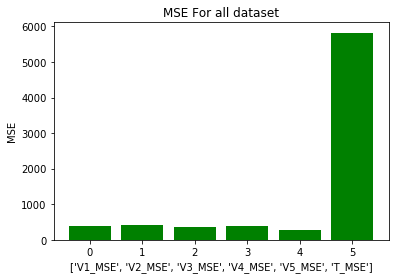

In [32]:
# Final plot of all dataset's MSE using random forest regressor
import matplotlib.pyplot as plt
x = ['V1_MSE', 'V2_MSE', 'V3_MSE', 'V4_MSE', 'V5_MSE','T_MSE']
y = [Variant_1_MSE,Variant_2_MSE,Variant_3_MSE,Variant_4_MSE,Variant_5_MSE,Variant_T_MSE]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel(x)
plt.ylabel("MSE")
plt.title("MSE For all dataset")
plt.show()

In [ ]:
#using keras -with cross validation

In [6]:
dataset = Variant_1.values

In [7]:
X=dataset[:,0:53]
Y=dataset[:,-1]

In [13]:
# define base model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(15, input_dim=53, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
# Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [15]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5, random_state=seed)
results1 = cross_val_score(pipeline, X,Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -1062.29 (983.96) MSE


In [ ]:
Variant_1_MSE=results1.mean()

In [21]:
#Varian_2
dataset = Variant_2.values
X_2=dataset[:,0:53]
Y_2=dataset[:,-1]

In [22]:
results2 = cross_val_score(pipeline, X_2,Y_2, cv=kfold)
Variant_2_MSE=results2.mean()
print("Standardized: %.2f (%.2f) MSE" % (results1.mean(), results1.std()))

Standardized: -1058.70 (679.59) MSE


In [24]:
#Varian_3
dataset = Variant_3.values
X_3=dataset[:,0:53]
Y_3=dataset[:,-1]

In [27]:
results3 = cross_val_score(pipeline, X_3,Y_3, cv=kfold)
Variant_3_MSE=results3.mean()
print("Standardized: %.2f (%.2f) MSE" % (results3.mean(), results3.std()))

Standardized: -805.09 (574.59) MSE


In [28]:
#Varian_4
dataset = Variant_4.values
X_4=dataset[:,0:53]
Y_4=dataset[:,-1]

In [29]:
results4 = cross_val_score(pipeline, X_4,Y_4, cv=kfold)
Variant_4_MSE=results4.mean()
print("Standardized: %.2f (%.2f) MSE" % (results4.mean(), results4.std()))

Standardized: -1278.00 (1418.92) MSE


In [32]:
#Varian_5
dataset = Variant_5.values
X_5=dataset[:,0:53]
Y_5=dataset[:,-1]

In [33]:
results5 = cross_val_score(pipeline, X_5,Y_5, cv=kfold)
Variant_5_MSE=results5.mean()
print("Standardized: %.2f (%.2f) MSE" % (results5.mean(), results5.std()))

Standardized: -811.63 (552.94) MSE


In [34]:
#Test set
dataset = TestSet.values
X_T=dataset[:,0:53]
Y_T=dataset[:,-1]

In [35]:
resultsT = cross_val_score(pipeline, X_T,Y_T, cv=kfold)
Test_MSE=resultsT.mean()
print("Standardized: %.2f (%.2f) MSE" % (resultsT.mean(), resultsT.std()))

Standardized: -10577.30 (4276.55) MSE


In [36]:
#pot results with keras

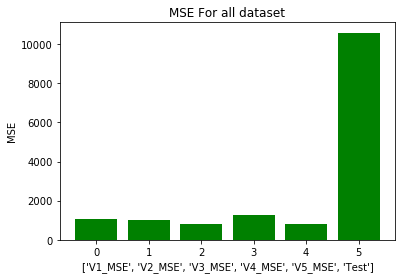

In [59]:
# Final plot of all dataset's MSE using random forest regressor
import matplotlib.pyplot as plt
x = ['V1_MSE', 'V2_MSE', 'V3_MSE', 'V4_MSE', 'V5_MSE', 'Test']
y = [np.absolute(Variant_1_MSE),np.absolute(Variant_2_MSE),np.absolute(Variant_3_MSE),np.absolute(Variant_4_MSE),np.absolute(Variant_5_MSE),np.absolute(Test_MSE)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel(x)
plt.ylabel("MSE")
plt.title("MSE For all dataset")
plt.show()

Conclusion: compared to Keras results random forest regressor returned better results in terms of MSE. I only used cross validation for keras, i believe it is due to my limited understanding of keras, i tried to run grid search with below code, it took really long time to run, i didnt get any error but couldnt get the result. 

In [47]:
#Keras+gridsearch--

In [8]:
model= KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [ ]:
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X,Y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))